# Swarm Intelligence - RB414 - February 2025
## Eng. Ahmed Métwalli
## Week 12 - ABC

# Artificial Bee Colony (ABC) on Rastrigin Function

## Objective

Minimize the **Rastrigin function** in high-dimensional space (e.g., 30D):

$$
f(\mathbf{x}) = An + \sum_{i=1}^{n} \left[ x_i^2 - A \cos(2\pi x_i) \right]
$$

---

## Overview of ABC Algorithm

ABC simulates the foraging behavior of honey bees. The colony consists of:
- **Employed Bees** – explore local solutions around known food sources.
- **Onlooker Bees** – probabilistically select promising sources to exploit.
- **Scout Bees** – randomly search new regions to escape stagnation.

---

## Algorithm Steps and Equations

### Step 1: Initialization

Randomly initialize food source within the search bounds.

### Step 2: Employed Bee Phase

Each employed bee modifies its solution to find a neighboring one:

$$
v_{ij} = x_{ij} + \phi_{ij} (x_{ij} - x_{kj}), \quad \phi_{ij} \in [-1, 1]
$$

Where:
- \( x_i \) is the current food source
- \( x_k \) is a randomly selected neighbor
- \( v_i \) is the new candidate solution

Accept if \( f(v_i) < f(x_i) \)

### Step 3: Probability Selection (Onlooker Bees)

Onlookers choose food sources with probability:

$$
p_i = \frac{1}{1 + f(x_i)} \bigg/ \sum_{j=1}^{SN} \frac{1}{1 + f(x_j)}
$$

Then generate new neighbors using the same formula as employed bees.

### Step 4: Scout Bee Phase

If a solution hasn’t improved for `limit` trials, it is abandoned:

$$
x_i \leftarrow \text{random vector in search space}
$$

### Step 5: Memorize Best Solution

Track the global best solution across all generations.

---

## Experimental Setup

| Parameter        | Value         |
|------------------|---------------|
| Function         | Rastrigin     |
| Dimensions       | 30            |
| Bounds           | [-5.12, 5.12] |
| Population Size  | 30 bees       |
| Max Iterations   | 1000          |
| Limit (trials)   | 100           |

---

<img src = rastr.png>

Best Solution (first 5 dimensions): [-8.78157374e-06 -2.13205379e-07 -2.25354077e-06  3.03802860e-08
 -9.05698176e-09]
Best Fitness: 1.2162197435827693e-06
Logged iterations: 1000


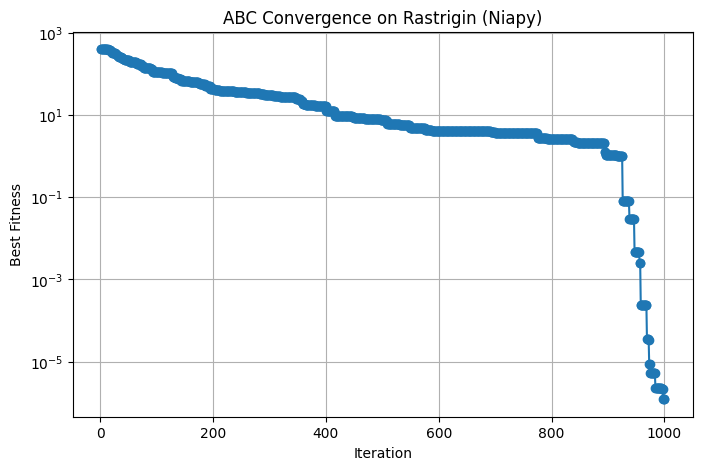

In [1]:
import matplotlib.pyplot as plt
from niapy.algorithms.basic.abc import ArtificialBeeColonyAlgorithm
from niapy.algorithms.basic.gwo import GreyWolfOptimizer # Your task
from niapy.task import Task # Task to be performed under ABC (Run Iteration manually created here - Section 1.1)
from niapy.problems import Rastrigin # Default dimension = 4

# STEP 1: Subclass ABC to log best fitness each iteration
class LoggingABC(ArtificialBeeColonyAlgorithm):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.fitness_history = []

## Section 1.1: Run Iteration
    def run_iteration(self,
                      task,
                      pop,
                      pop_f, best,
                      best_f
                      , **params):
        pop, pop_f, best, best_f, params = super().run_iteration(task, pop, pop_f, best, best_f, **params)
        self.fitness_history.append(best_f) # Append the best fitness so far
        return pop, pop_f, best, best_f, params

# STEP 2: Initialize the benchmark problem
def initialize_swarm(seed=42, dimension=30): # Dimension of problem (Rastrigin)
    problem = Rastrigin(dimension=dimension) # Dimension are 30 (problem initated)
    task = Task(problem=problem, max_iters=1000) # task initated
    abc = LoggingABC(population_size=30, limit=100, seed=seed)
    return abc, task

# STEP 3: Communication logic placeholder (ABC handles this internally via pheromones)
def communication(abc): # Placeholder
    pass  # ABC uses implicit pheromone logic internally

# STEP 4: Run optimization manually and return fitness log
def manual_evolve(abc, task):
    """
    Takes:
        - abc: ArtificialBeeColonnyAlgorithm class
        - task: Task class
    """
    best_solution, best_fitness = abc.run(task)
    return abc.fitness_history, best_solution, best_fitness

# STEP 5: Termination check placeholder
def meet_termination_conditions(): # As a placeholder
    pass

# STEP 6: Display results and plot convergence
def display_solution(best_solution, best_fitness, fitness_history):
    print("Best Solution (first 5 dimensions):", best_solution[:5])
    print("Best Fitness:", best_fitness)
    print("Logged iterations:", len(fitness_history))

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(fitness_history) + 1), fitness_history, marker='o', linestyle='-')
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.title('ABC Convergence on Rastrigin (Niapy)')
    plt.grid(True)
    plt.show()

# Main routine
abc, task = initialize_swarm() # Initializes abc from logging abc custom class
communication(abc)
fitness_history, best_solution, best_fitness = manual_evolve(abc, task)
meet_termination_conditions()
display_solution(best_solution, best_fitness, fitness_history)


## ABC Optimization Summary on Rastrigin (30D)

- **Our Objective:** Was tp minimize the Rastrigin function in 30 dimensions.
- **The Best Fitness Achieved:** `1.216e-06` (near-global minimum at 0)
- **The Best Solution (first 5 dims):** `[-8.78e-06, -2.13e-07, -2.25e-06, 3.04e-08, -9.05e-09]`
- **Total Iterations Logged:** `1000`
- **Population Size:** 30 bees
- **Scout Limit:** 100 trials
- **Convergence Insight:**
  - Early flat plateau due to local minima (0–800)
  - Sharp convergence after ~900 iterations
  - Excellent balance between exploration and exploitation

> Result: ABC successfully escaped local minima and approximated the global optimum with high precision.


## Strategies to Accelerate Convergence in ABC

When optimizing complex functions like **Rastrigin**, convergence can be slow. Below are actionable strategies to speed it up:

---

### Parameter Tweaks

- **Increase Population Size**  
  > Boost swarm diversity for broader initial exploration.  
  `population_size = 50` or `100`

- **Lower the Scout Limit (`limit`)**  
  > Forces earlier abandonment of stagnated solutions.  
  `limit = 20–50` instead of `100`

- **Reduce Dimensionality (if feasible - This should be last option)**  
  > Lower dimensions reduce search complexity.  
  Try `dimension = 10–20` for test runs.

---

### Algorithm Enhancements

- **Hybridize with Local Search**  
  > Use local optimizers (e.g. Nelder-Mead) to refine best solution.  
  Combine:
  ```python
  scipy.optimize.minimize(best_solution, method='Nelder-Mead')
